In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [114]:
df=pd.read_csv("credit scoring.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_14700\2082072843.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("credit scoring.csv")


In [115]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [116]:
df.shape


(100000, 28)

In [117]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [119]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [120]:
df.duplicated().sum()

0

In [121]:
df['Name'].isnull().sum()

9985

In [122]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(numerical_features))
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", list(categorical_features))



Numerical Features: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical Features: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [123]:
# Convert Credit_History_Age to numeric (months) if already in numeric form
import re

def convert_credit_age(value):
    if pd.isna(value):
        return None
    years = int(re.search(r'(\d+)\s+Years', value).group(1))
    months = int(re.search(r'(\d+)\s+Months', value).group(1))
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_age)

# Ensure Num_of_Delayed_Payment is integer
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)

# Convert Monthly_Balance to float
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce').astype(float)

# Convert Amount_invested_monthly to float
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').astype(float)





In [124]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", list(numerical_features))
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Features:", list(categorical_features))


Numerical Features: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Categorical Features: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


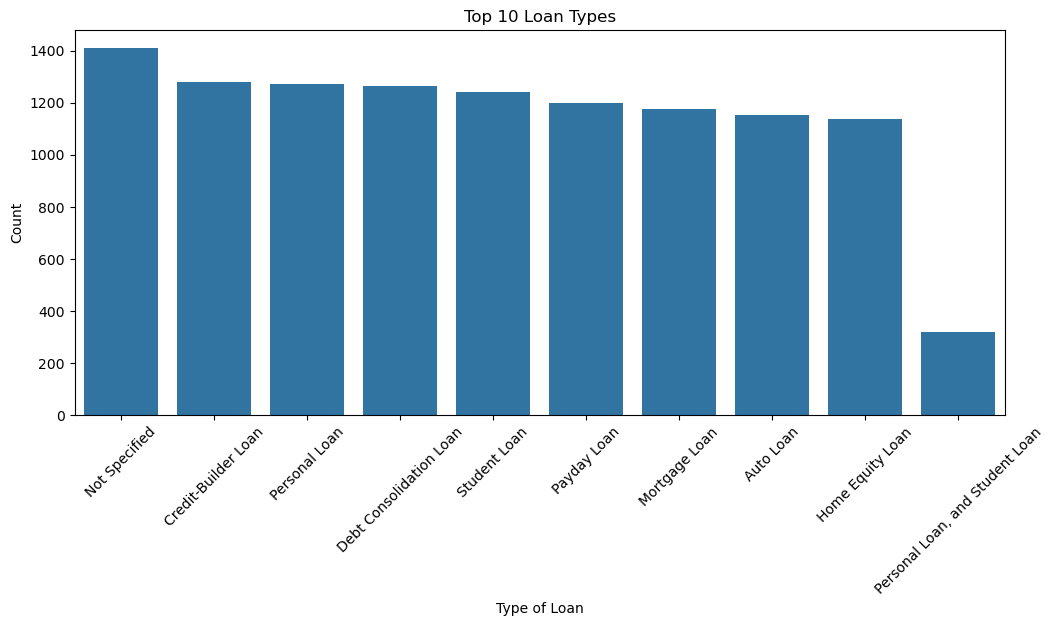

<Figure size 1200x600 with 0 Axes>

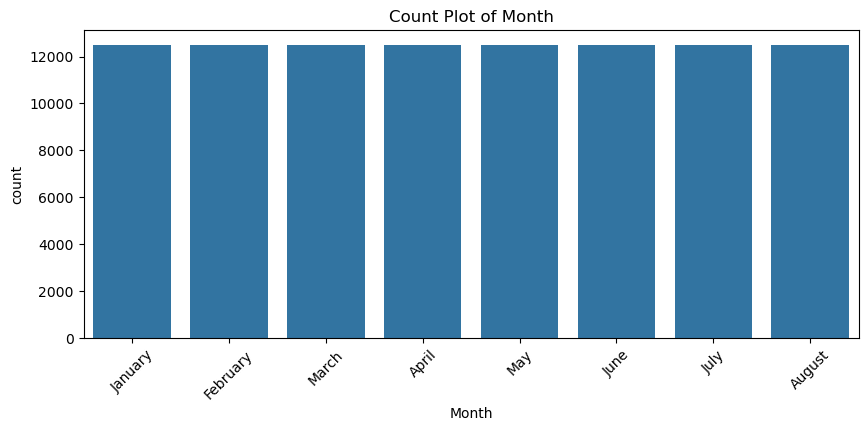

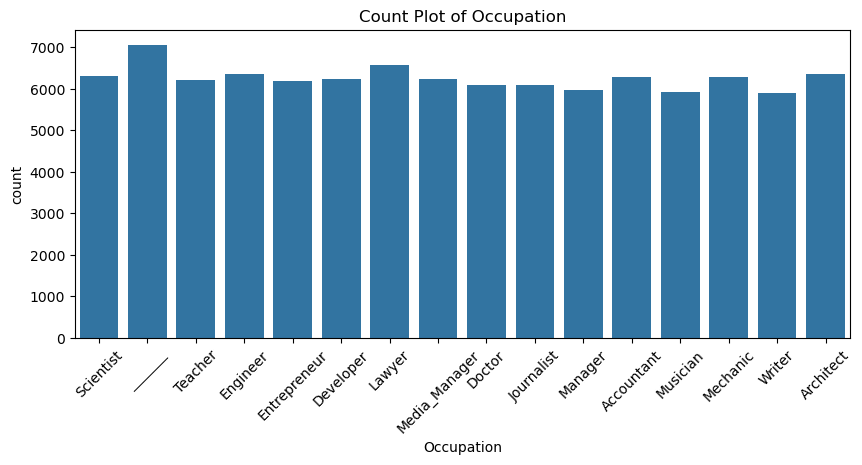

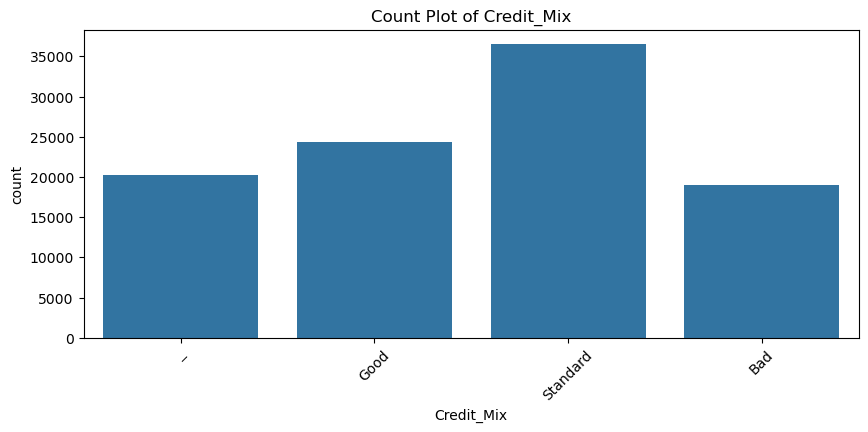

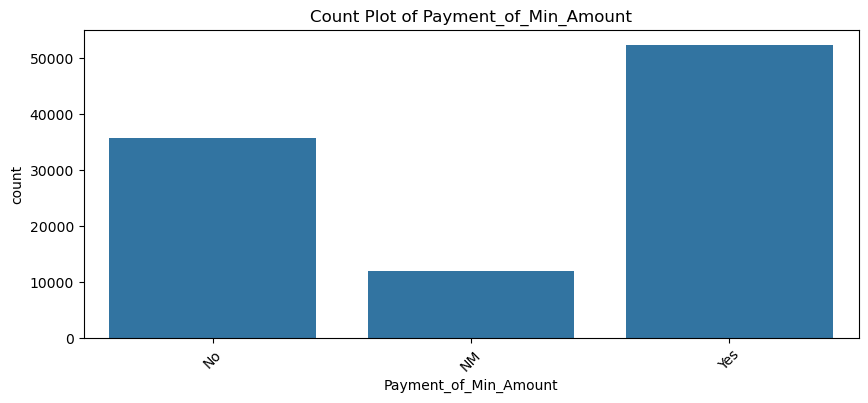

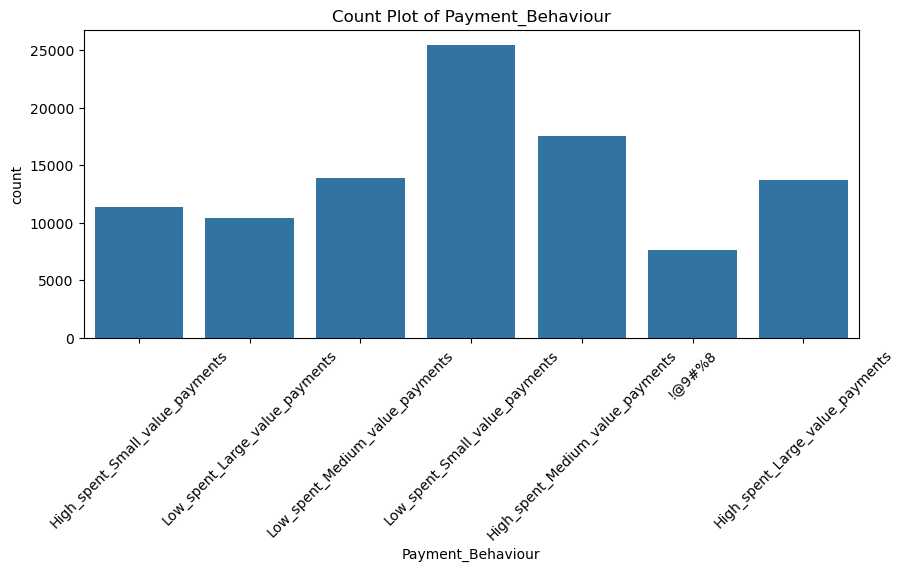

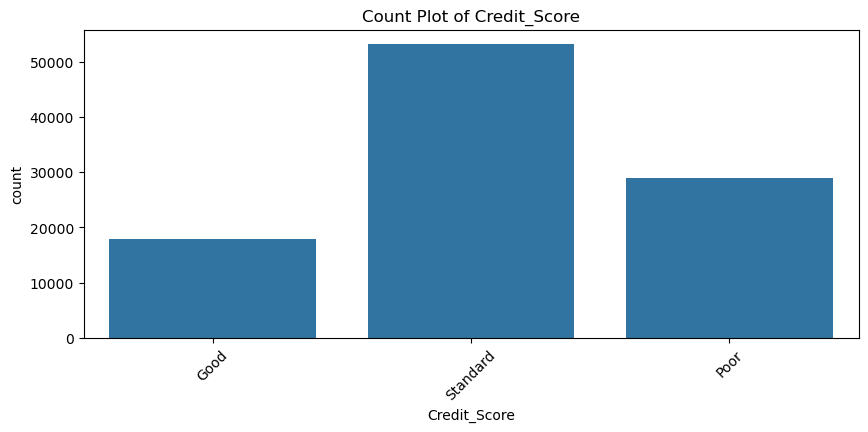

In [125]:
plt.figure(figsize=(12,5))
top10 = df['Type_of_Loan'].value_counts().head(10)

sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Loan Types")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Type of Loan")
plt.show()



cat_cols = [
    'Month', 
    'Occupation', 
    
     
    'Credit_Mix',
    'Payment_of_Min_Amount', 
    'Payment_Behaviour',
    'Credit_Score'
]

plt.figure(figsize=(12, 6))

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()



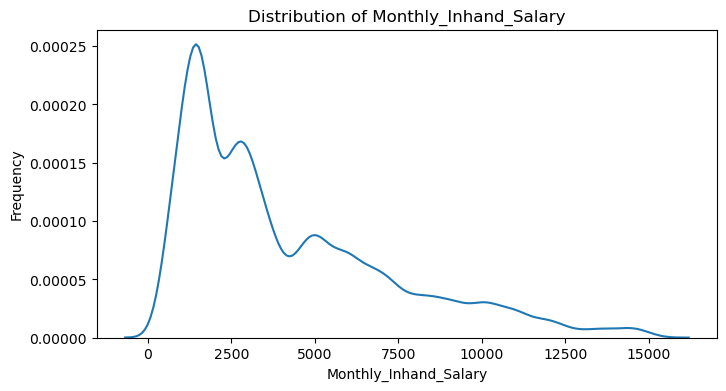

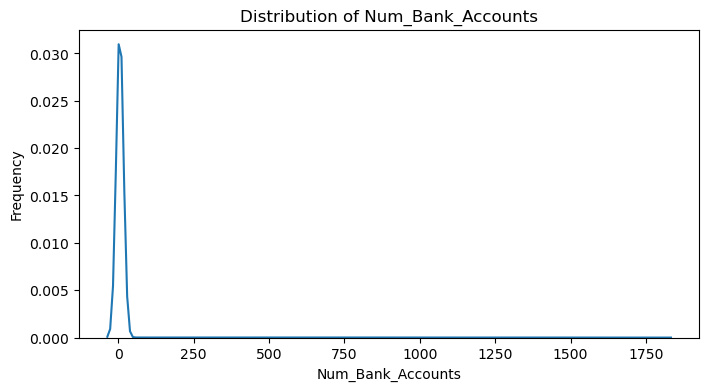

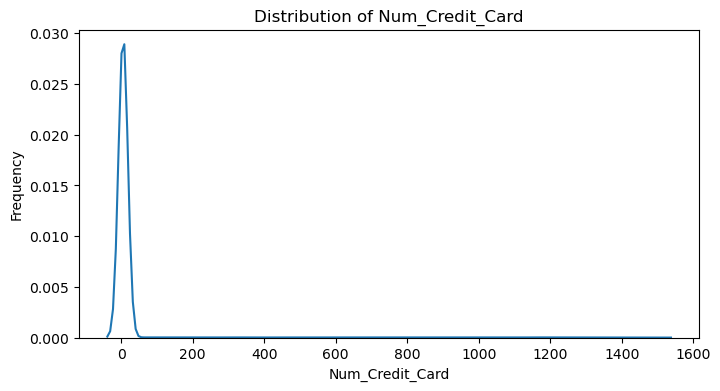

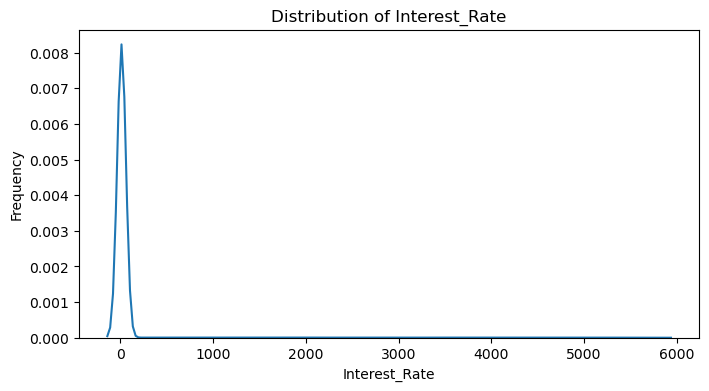

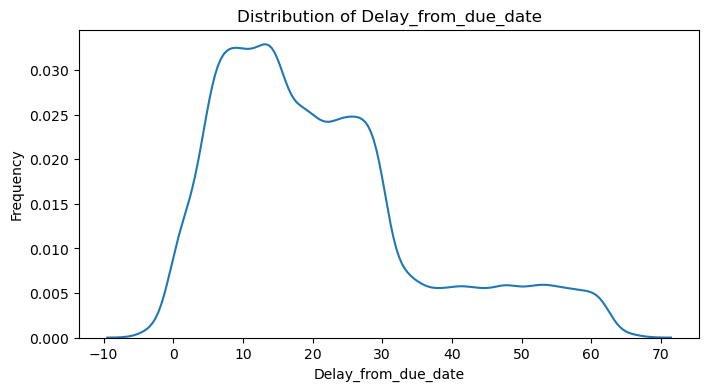

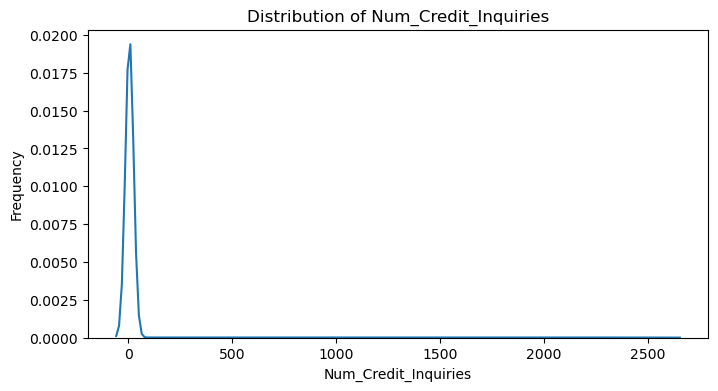

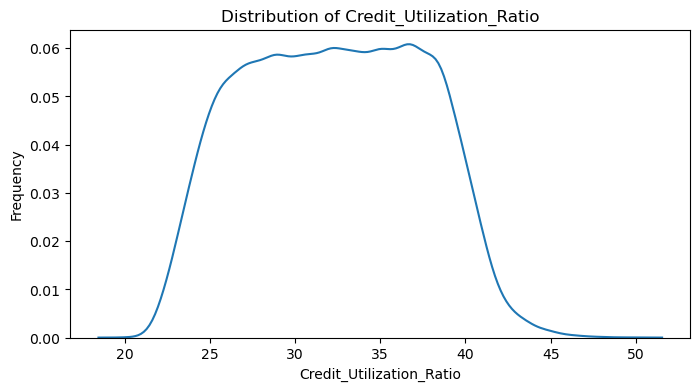

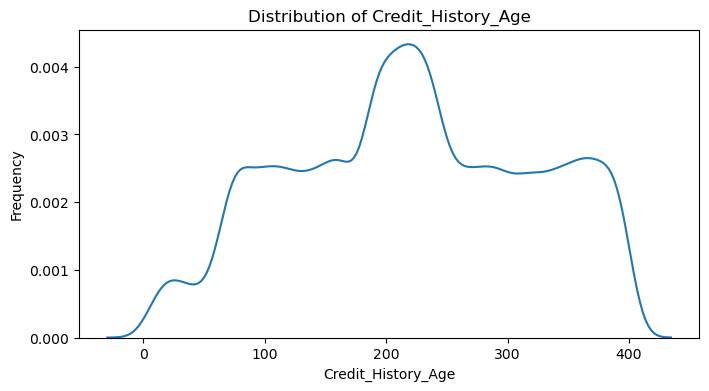

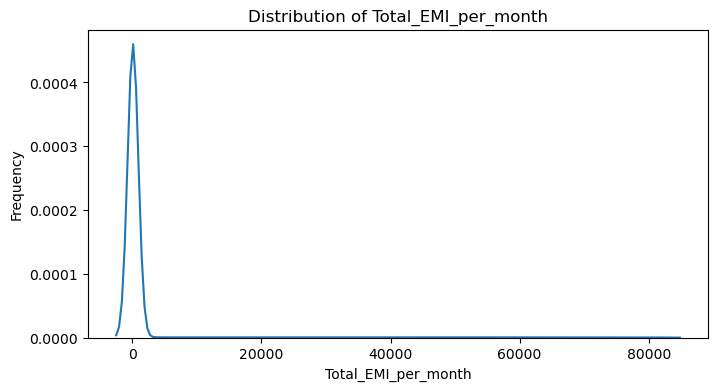

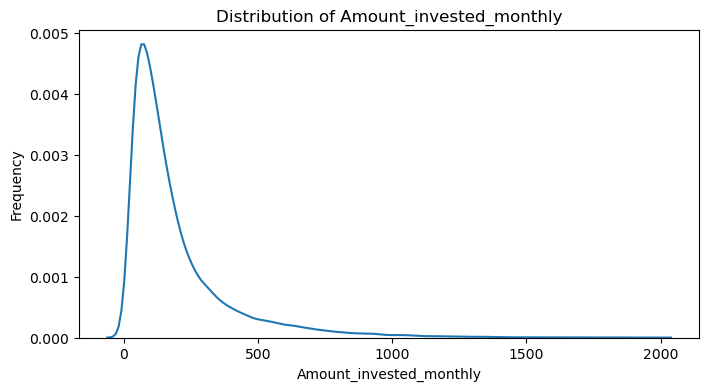

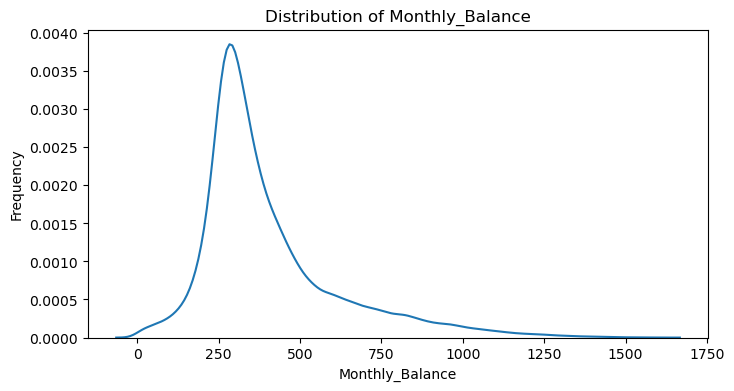

In [126]:


# Loop through all numerical features
for col in numerical_features:  # assuming you already have numerical_features list
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


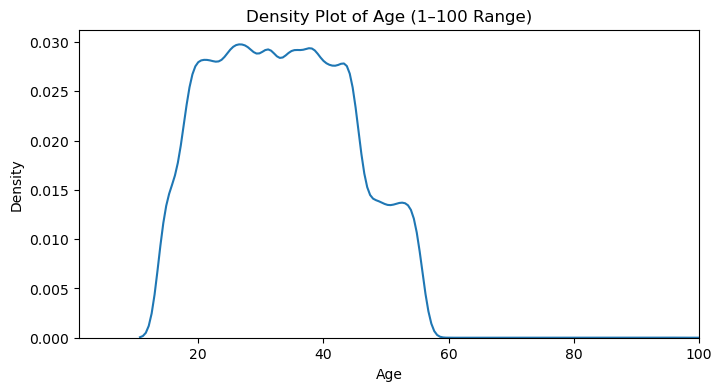

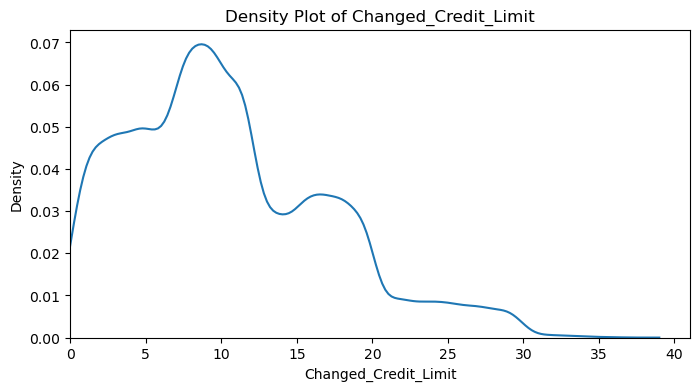

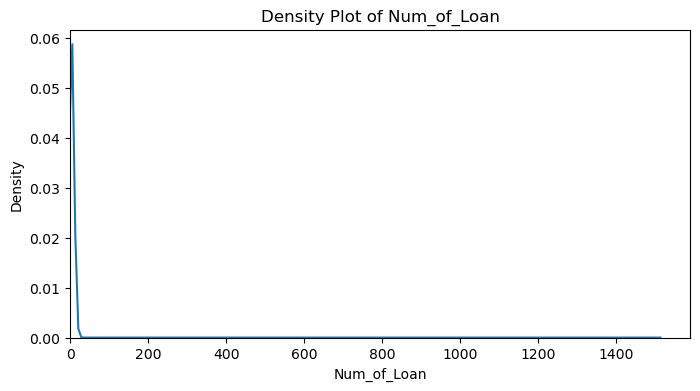

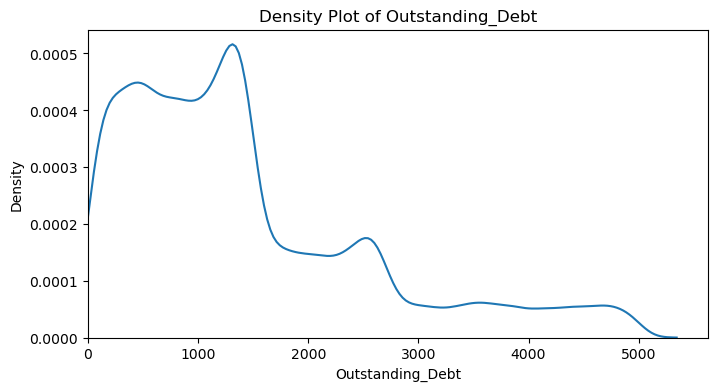

In [131]:

num_cols = ['Changed_Credit_Limit', 'Num_of_Loan', 'Outstanding_Debt']

# Convert object → numeric
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df_age_clean = df[(df['Age'] >= 1) & (df['Age'] <= 100)]

plt.figure(figsize=(8, 4))
sns.kdeplot(df_age_clean['Age'])
plt.xlim(1, 100)   # show only 1 to 100
plt.title("Density Plot of Age (1–100 Range)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()
for col in num_cols:
    df[col] = df[col].clip(lower=0)
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col])
    plt.xlim(0, None)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()




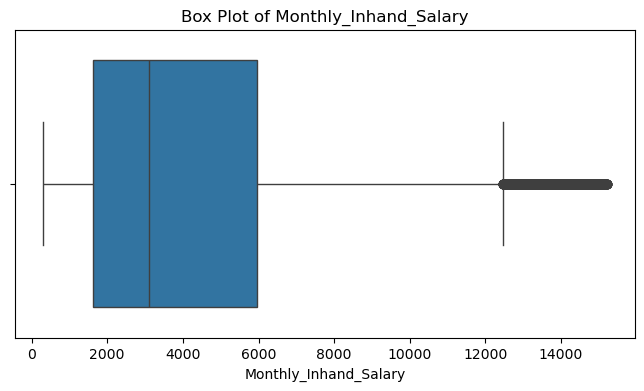

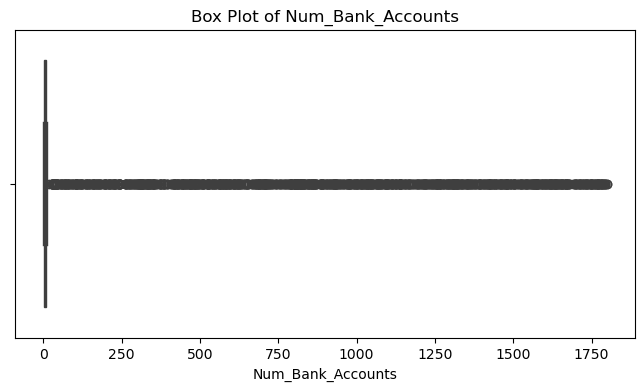

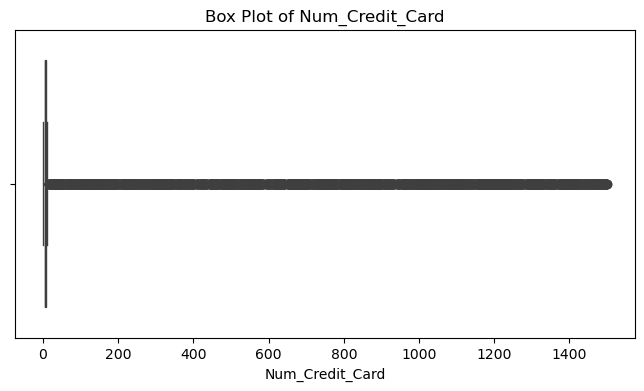

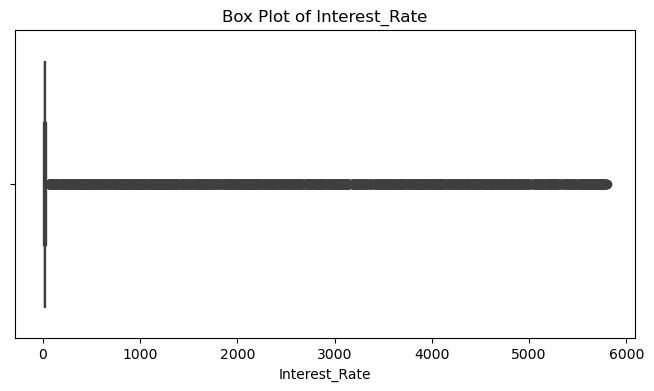

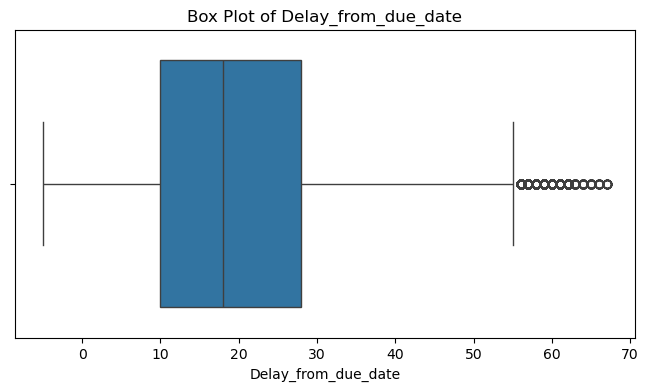

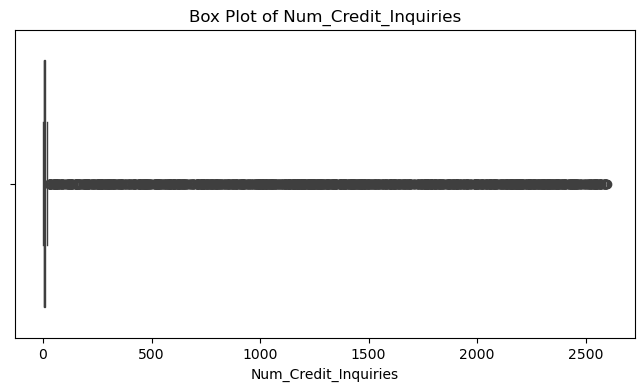

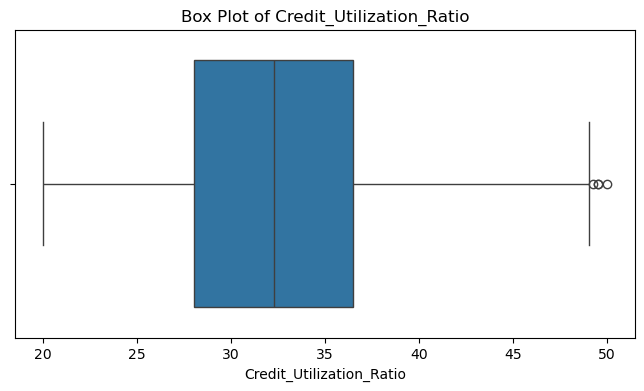

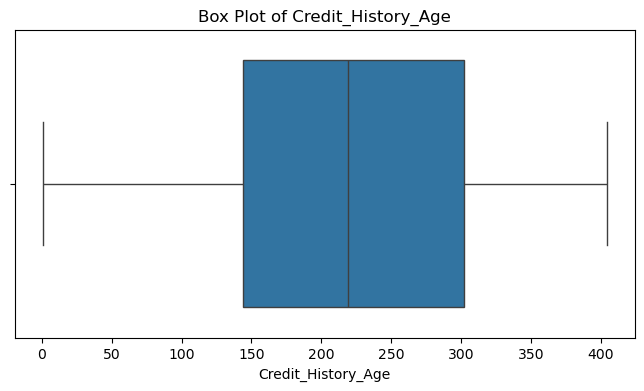

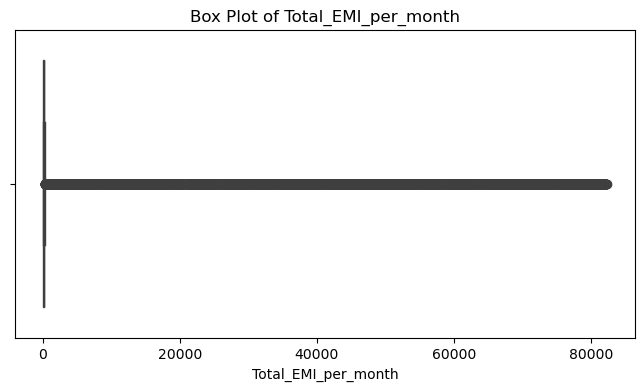

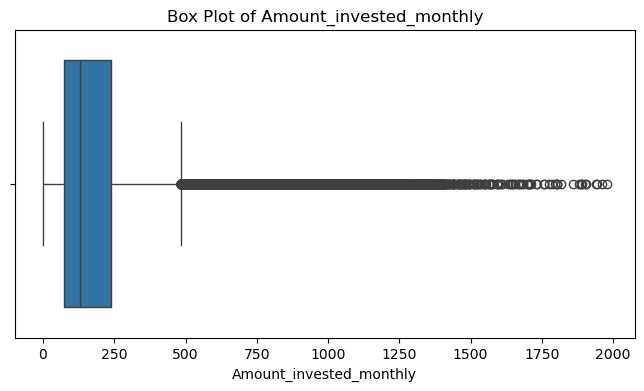

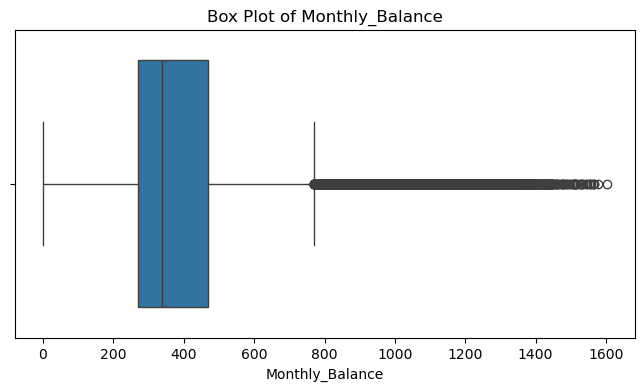

In [135]:


# Loop through each numerical feature and plot separately
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    
    sns.boxplot(x=df[col])  # clip negative values if needed
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [75]:
# Create mapping: Customer_ID → Name
name_map = df.groupby("Customer_ID")["Name"].apply(lambda x: x.dropna().iloc[0] if x.notna().any() else None)

# Fill missing names using this mapping
df["Name"] = df.apply(
    lambda row: name_map[row["Customer_ID"]] if pd.isna(row["Name"]) else row["Name"],
    axis=1
)








In [76]:
monthlysalary_map = df.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(lambda x: x.dropna().iloc[0] if x.notna().any() else None)

# Fill missing names using this mapping
df["Monthly_Inhand_Salary"] = df.apply(
    lambda row: monthlysalary_map[row["Customer_ID"]] if pd.isna(row["Monthly_Inhand_Salary"]) else row["Monthly_Inhand_Salary"],
    axis=1
)
df['Monthly_Inhand_Salary'].isnull().sum()

0

In [77]:
df['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

In [78]:
df.groupby('Customer_ID')['Type_of_Loan'].unique()


Customer_ID
CUS_0x1000          [Credit-Builder Loan, and Home Equity Loan]
CUS_0x1009    [Not Specified, Home Equity Loan, Credit-Build...
CUS_0x100b                                                [nan]
CUS_0x1011    [Student Loan, Credit-Builder Loan, and Debt C...
CUS_0x1013    [Student Loan, Debt Consolidation Loan, and Pe...
                                    ...                        
CUS_0xff3         [Personal Loan, Mortgage Loan, and Auto Loan]
CUS_0xff4     [Not Specified, Student Loan, Student Loan, Cr...
CUS_0xff6                     [Home Equity Loan, and Auto Loan]
CUS_0xffc     [Credit-Builder Loan, Payday Loan, Not Specifi...
CUS_0xffd     [Auto Loan, Payday Loan, Payday Loan, Mortgage...
Name: Type_of_Loan, Length: 12500, dtype: object

In [79]:
df["Type_of_Loan"].isnull().sum()

11408

In [80]:
df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_14700\2895518561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0], inplace=True)


In [81]:
df['Num_of_Delayed_Payment'].head()

0    7
1    0
2    7
3    4
4    0
Name: Num_of_Delayed_Payment, dtype: int32

In [82]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'] \
                                   .transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df['Num_of_Delayed_Payment'].isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_14700\3084928240.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


0

In [83]:
df['Num_Credit_Inquiries'].isnull().sum()

1965

In [84]:
df['Num_Credit_Inquiries'].head()


0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Num_Credit_Inquiries, dtype: float64

<Axes: xlabel='Num_Credit_Inquiries', ylabel='Density'>

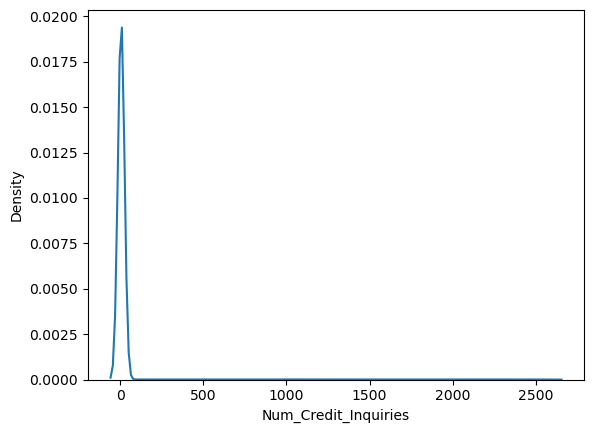

In [85]:
sns.kdeplot(df['Num_Credit_Inquiries'])

In [86]:
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_14700\1626421896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)


In [87]:
df['Num_Credit_Inquiries']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

In [88]:
df['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [89]:
df.groupby("Customer_ID")["Credit_History_Age"].nunique()


Customer_ID
CUS_0x1000    8
CUS_0x1009    7
CUS_0x100b    7
CUS_0x1011    8
CUS_0x1013    7
             ..
CUS_0xff3     7
CUS_0xff4     7
CUS_0xff6     8
CUS_0xffc     6
CUS_0xffd     8
Name: Credit_History_Age, Length: 12500, dtype: int64

In [90]:
# import re

# def convert_credit_age(value):
#     if pd.isna(value):
#         return None
#     years = int(re.search(r'(\d+)\s+Years', value).group(1))
#     months = int(re.search(r'(\d+)\s+Months', value).group(1))
#     return years * 12 + months

# df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_age)



In [91]:
df['Credit_History_Age'].isnull().sum()

9030

In [92]:
df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

<Axes: xlabel='Credit_History_Age', ylabel='Density'>

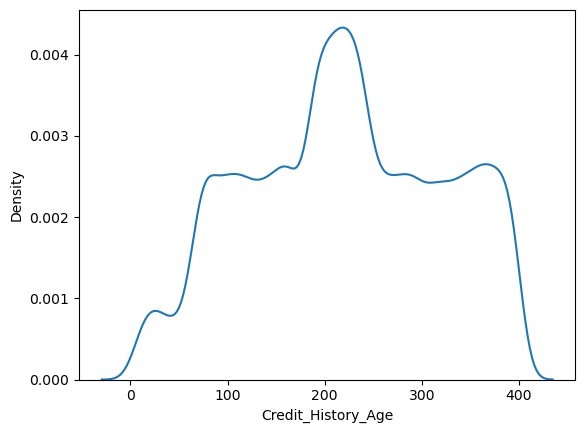

In [93]:
sns.kdeplot(df['Credit_History_Age'])

In [94]:
df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)


In [95]:
df['Amount_invested_monthly'].isnull().sum()

8784

In [96]:
df['Amount_invested_monthly'].head(10)

0     80.415295
1    118.280222
2     81.699521
3    199.458074
4     41.420153
5     62.430172
6    178.344067
7     24.785217
8    104.291825
9     40.391238
Name: Amount_invested_monthly, dtype: float64

<Axes: xlabel='Amount_invested_monthly', ylabel='Density'>

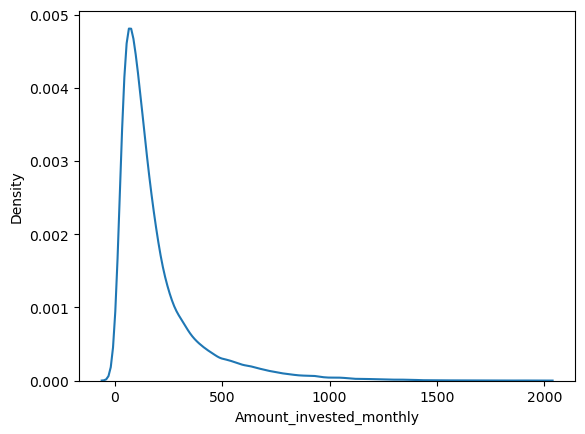

In [97]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
sns.kdeplot(df['Amount_invested_monthly'])



In [98]:
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14700\3670205184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)


In [99]:
df['Amount_invested_monthly'].isnull().sum()

0

In [100]:
df['Monthly_Balance'].head()

0    312.494089
1    284.629162
2    331.209863
3    223.451310
4    341.489231
Name: Monthly_Balance, dtype: float64

<Axes: xlabel='Monthly_Balance', ylabel='Density'>

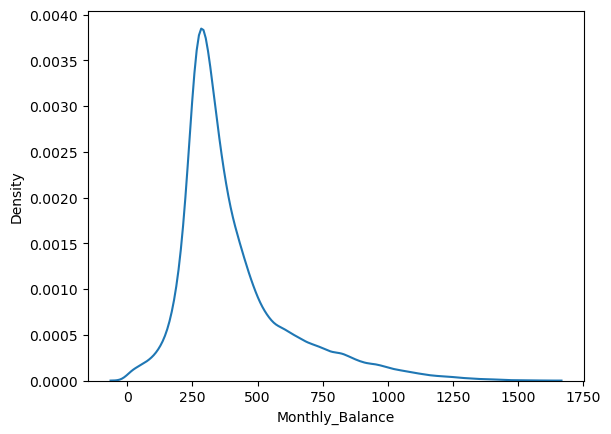

In [101]:
df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')
sns.kdeplot(df['Monthly_Balance'])

In [102]:
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14700\4052894041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(),inplace=True)


In [103]:
df['Monthly_Balance'].isnull().sum()

0

In [104]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64